# Plot Decision Tree

In [1]:
import numpy  as np
import pandas as pd

In [2]:
df_trn = pd.read_csv('../data/train-agg-cut.csv')
df_tst = pd.read_csv('../data/test-agg-cut.csv')
df_sbm = pd.read_csv('../data/sample_submission.csv')

In [3]:
X_trn = df_trn.drop(columns=['FraudResult'], axis=1)
y_trn = df_trn['FraudResult']

X_tst = df_tst

In [4]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

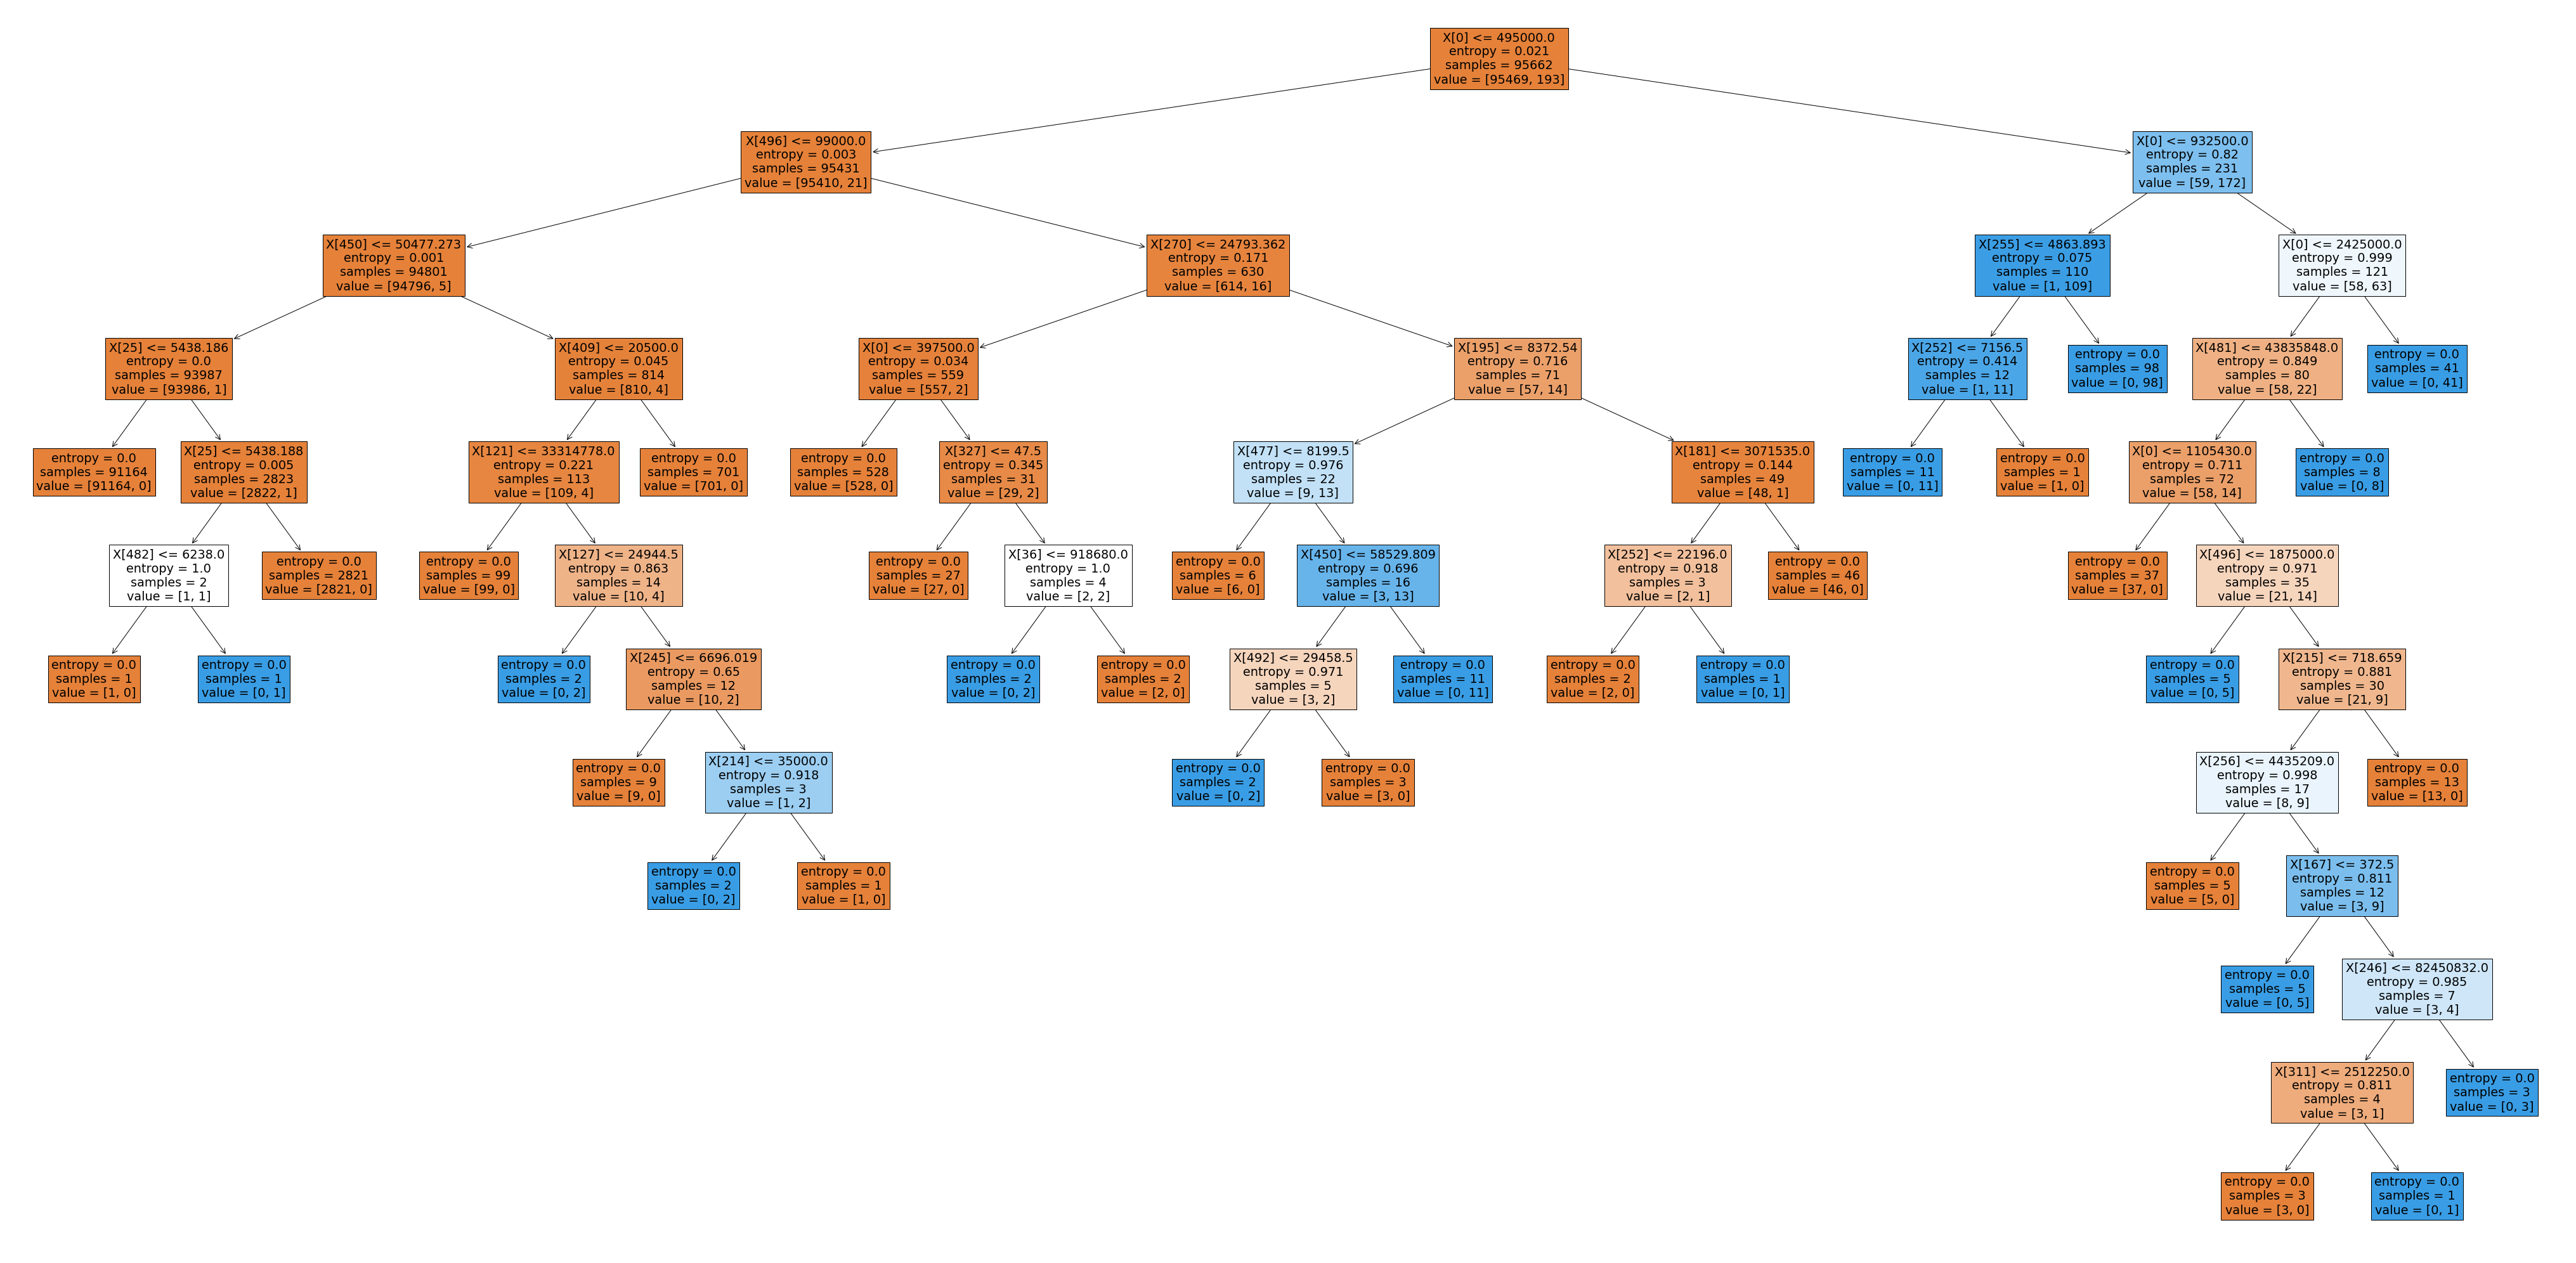

In [9]:
plt.figure(figsize=(72,36))
clf = DecisionTreeClassifier(
    criterion='entropy', 
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features=None
#     max_leaf_nodes=None  # Grow a tree with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.
).fit(X_trn, y_trn)
plot_tree(clf, filled=True)
plt.show()

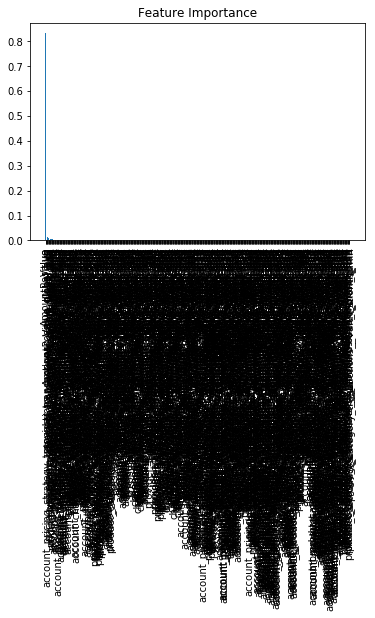

In [16]:
# Calculate feature importances
importances = clf.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [X_trn.columns[i] for i in indices]

# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X_trn.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X_trn.shape[1]), names, rotation=90)

# Show plot
plt.show()

In [22]:
np.where(importances > 0.0)

(array([  0,  25,  36, 121, 127, 167, 181, 195, 214, 215, 245, 246, 252,
        255, 256, 270, 311, 327, 409, 450, 477, 481, 482, 492, 496]),)

In [23]:
importances

array([0.83255245, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00795705, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.00199389, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [28]:
import graphviz
from sklearn import tree

In [29]:
dot_data = tree.export_graphviz(
    clf, 
    out_file=None,
    feature_names=X_trn.columns,
    filled=True,
    rounded=True,
    special_characters=True
)
graph = graphviz.Source(dot_data)
graph.render('../myNotebooks/DecisionTree-train-agg-cut-498features')

'../myNotebooks/DecisionTree-train-agg-cut-498features.pdf'

### 5 'super features' from top20 $\chi^2$

In [30]:
columns5 = [
    'AmountPositive',                                                           #01
#     'Value',                                                                    #02
    'account_product_transactions__AmountPositive_global_sum',                  #03
    'account_provider_transactions__AmountPositive_global_avg',                 #04
#     'account_product_category_transactions__AmountPositive_global_sum',         #05
#     'account_provider_transactions__Value_global_avg',                          #06
#     'account_provider_transactions__AmountPositive_global_sum',                 #07
#     'account_channel_transactions__AmountPositive_global_sum',                  #08
#     'account_product_transactions__AmountPositive_global_avg',                  #09
#     'account_transactions__AmountPositive_global_sum',                          #10
#     'account_pricing_strategy_transactions__AmountPositive_global_sum',         #11
#     'account_product_category_transactions__AmountPositive_global_avg',         #12
    'account_product_transactions__AmountPositive_week_sum',                    #13
#     'account_provider_transactions__AmountPositive_week_avg',                   #14
#     'account_pricing_strategy_transactions__AmountPositive_global_avg',         #15
#     'account_product_transactions__Value_global_avg',                           #16
#     'account_product_category_transactions__Value_global_avg',                  #17
    'account_channel_transactions__AmountPositive_global_avg',                  #18
#     'account_transactions__AmountPositive_global_avg',                          #19
#     'account_provider_transactions__AmountPositive_week_sum'                    #20
]

In [31]:
X_trn_5 = X_trn.drop(columns=columns5, axis=1)

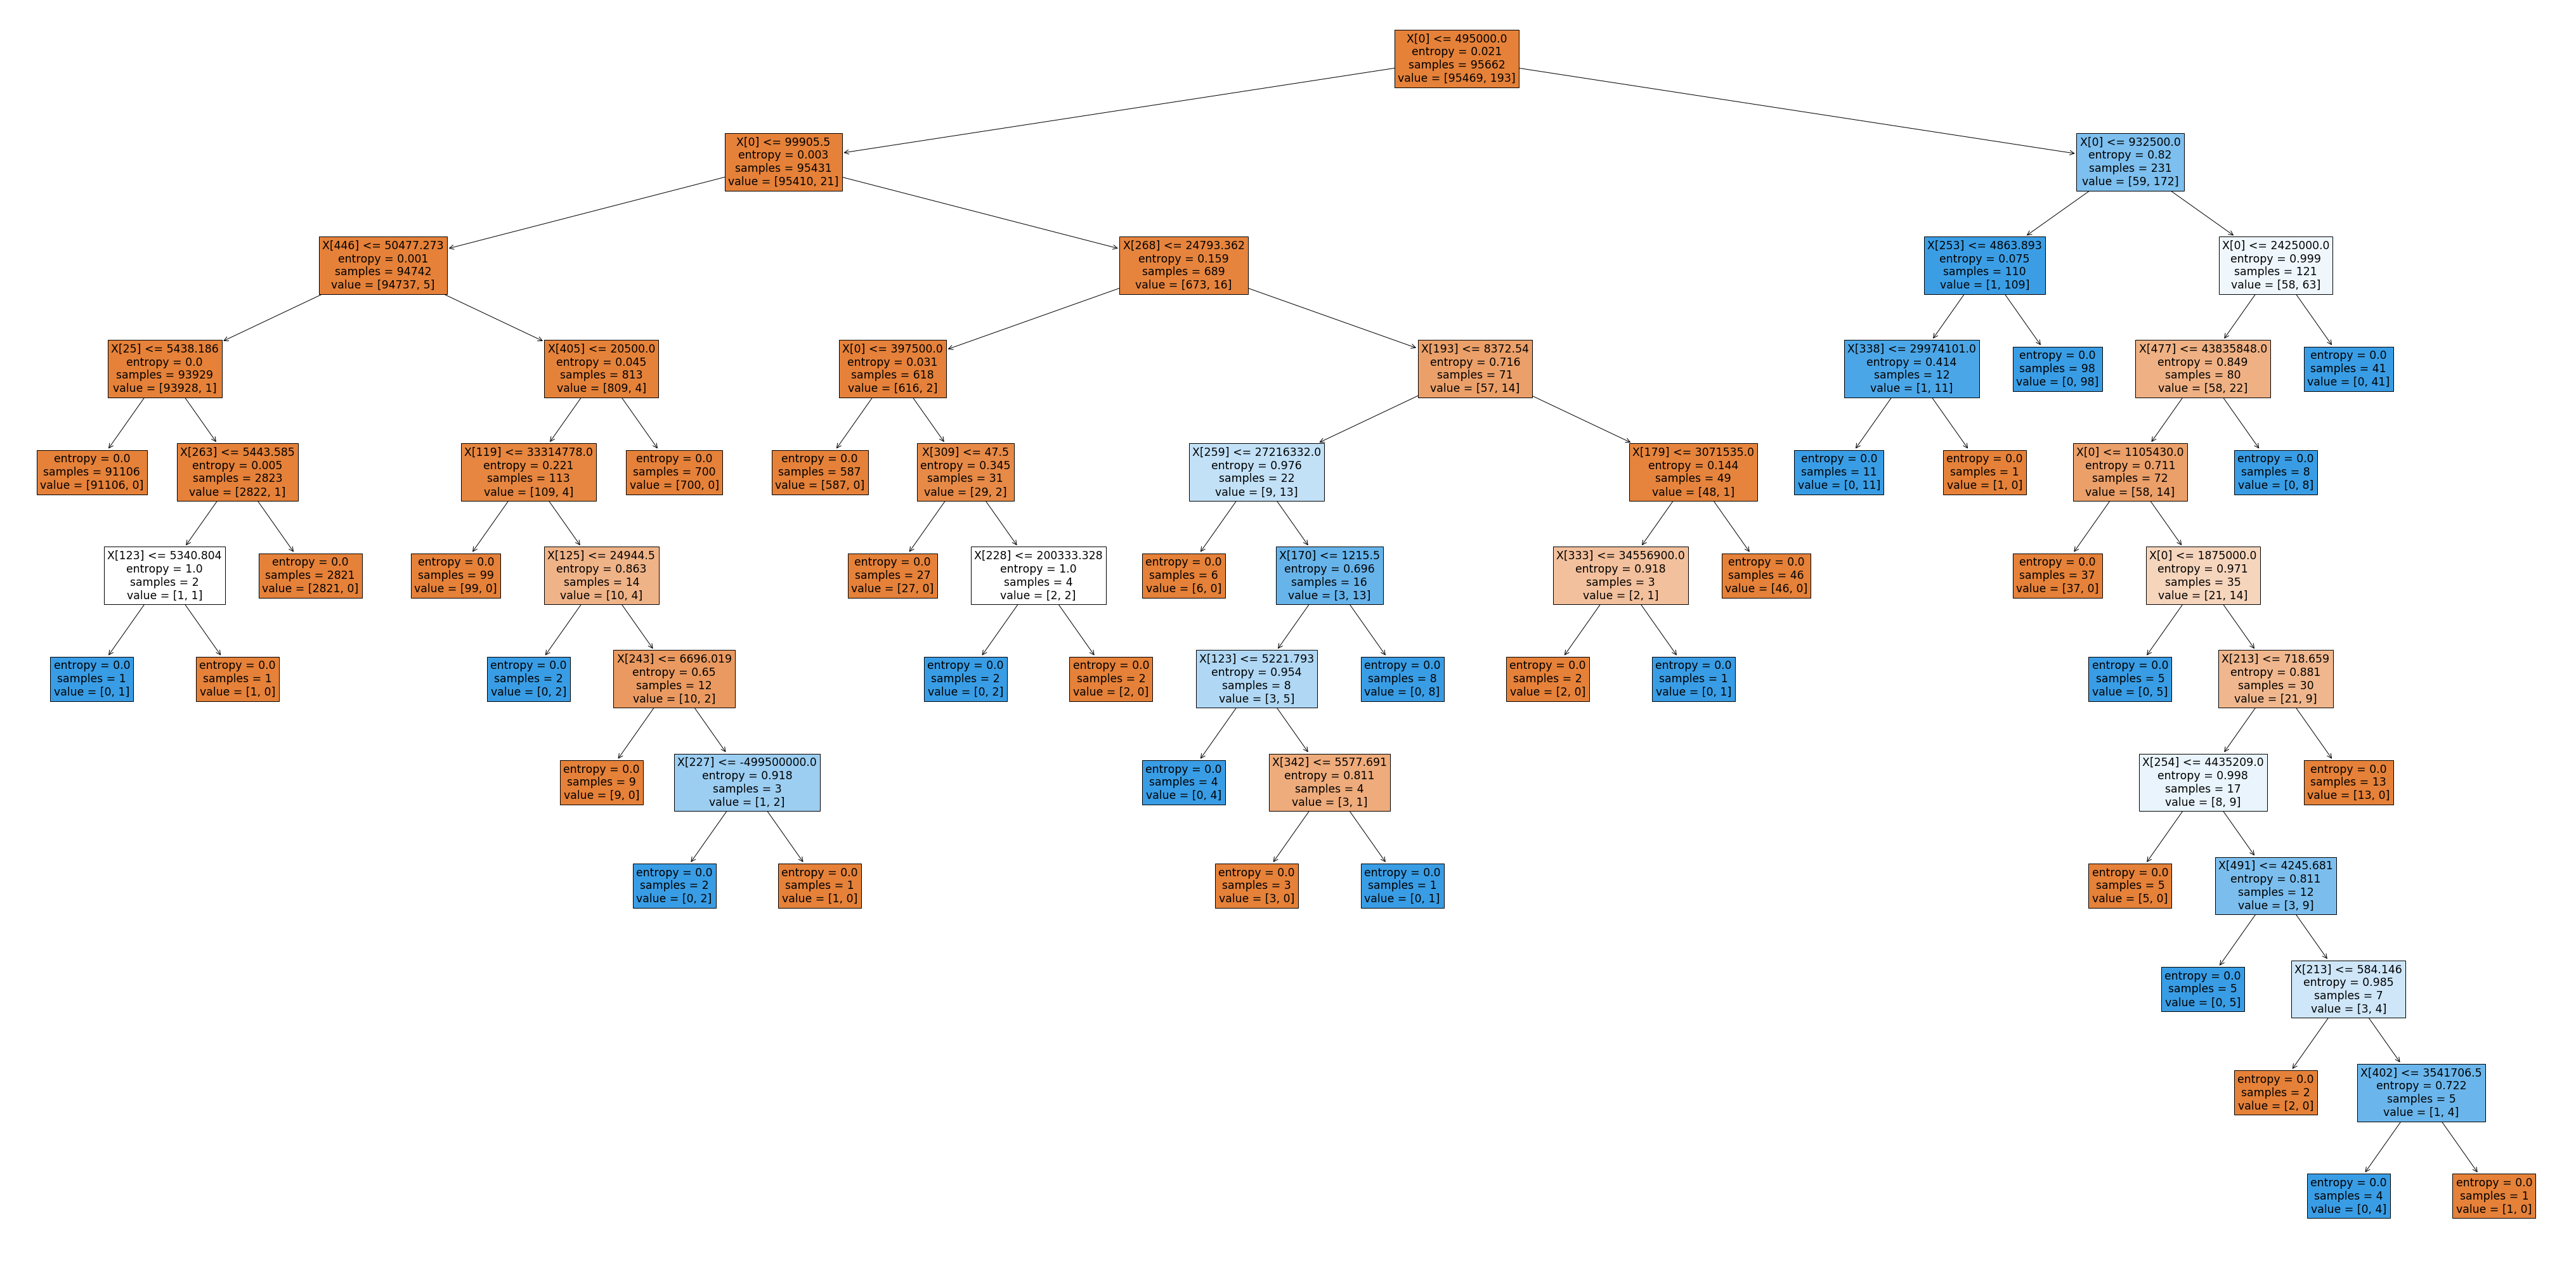

In [32]:
plt.figure(figsize=(72,36))
clf = DecisionTreeClassifier(
    criterion='entropy', 
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features=None
#     max_leaf_nodes=None  # Grow a tree with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.
).fit(X_trn_5, y_trn)
plot_tree(clf, filled=True)
plt.show()

In [34]:
dot_data = tree.export_graphviz(
    clf, 
    out_file=None,
    feature_names=X_trn_5.columns,
    filled=True,
    rounded=True,
    special_characters=True
)
graph = graphviz.Source(dot_data)
graph.render('../myNotebooks/DecisionTree-5features')

'../myNotebooks/DecisionTree-5features.pdf'